In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [5]:
data = pd.read_csv('Housing.csv')
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [7]:
correlations = data_encoded.corr()['price'].sort_values(ascending=False)
print("\nTop Top correlations with price are: ")
print(correlations.head(10));


Top Top correlations with price are: 
price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
Name: price, dtype: float64


In [8]:
X = data_encoded[['price']]
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_simple = model_simple.predict(X_test)

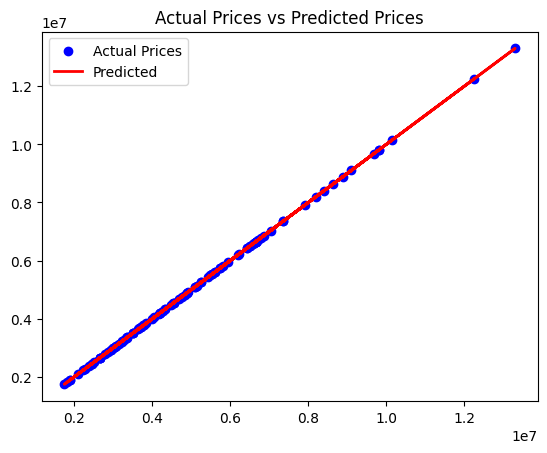

In [11]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel=('Area')
plt.ylabel=('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [12]:
print('\n Simple Linear Reegression')
print('coefficient is: ', model_simple.coef_)
print('Intercept is: ', model_simple.intercept_)
print('R2 score is: ', r2_score(y_test, y_pred_simple))
print('MSE is: ', mean_squared_error(y_test, y_pred_simple))


 Simple Linear Reegression
coefficient is:  [1.]
Intercept is:  -9.313225746154785e-10
R2 score is:  1.0
MSE is:  3.3421277977534817e-19
